### <Center> **Fundamentals of Neural Networks: Building and Training a Perceptron** </Center> 

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [94]:
print(os.path.exists("variant5-heart-disease.csv"))

True


In [95]:
data = pd.read_csv("variant5-heart-disease.csv", encoding='latin1')

In [96]:
print(data.isnull().sum())

ï»¿age      0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [97]:
print("Розмір даних:", data.shape)

Розмір даних: (303, 14)


In [98]:
print('columns count - ',len(data.columns), '\n')
print('columns: ',list(data.columns))

columns count -  14 

columns:  ['ï»¿age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
# Drop the ID column and separate features and target
X = data.drop(columns=['target']).values 
y = data['target'].values

In [101]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
data.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# Standardize the feature values for better training performance
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test)) 

In [104]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32) # Training features as a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Training labels as a tensor
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32) # Testing features as a tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1) # Testing labels as a tensor

In [105]:
# Define a simple Multi-Layer Perceptron (MLP) for binary classification
class BinaryClassificationMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      super(BinaryClassificationMLP, self).__init__()
      self.hidden_layer = nn.Linear(input_size, hidden_size) # First layer (input to hidden)
      self.output_layer = nn.Linear(hidden_size, output_size) # Second layer (hidden to output)
      self.relu = nn.ReLU() # ReLU activation function for hidden layer
      self.sigmoid = nn.Sigmoid() # Sigmoid activation for output layer
    def forward(self, x):
      x = self.hidden_layer(x) # Linear transformation for the hidden layer
      x = self.relu(x) # Apply ReLU activation
      x = self.output_layer(x) # Linear transformation for the output layer
      x = self.sigmoid(x) # Apply sigmoid activation for binary classification
      return x

In [106]:
# Set hyperparameters
input_size = X_train.shape[1] # Number of features in the dataset
hidden_size = 45 # Number of neurons in the hidden layer
output_size = 1 # Binary classification output
learning_rate = 0.01 # Learning rate for the optimizer
num_epochs = 1000 # Number of epochs to train the model

In [107]:
# Initialize the model, loss function, and optimizer
model = BinaryClassificationMLP(input_size, hidden_size, output_size) # Create the model instance
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Adam 
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [108]:
# Metrics and logging
losses = []
accuracies = []

In [109]:
# Training loop
model.train() # Set the model to training mode
for epoch in range(num_epochs):
 # Forward pass: compute predictions
 outputs = model(X_train_tensor)
 # Compute the loss between predictions and actual labels
 loss = criterion(outputs, y_train_tensor)
 losses.append(loss.item())
 # Convert predictions to binary values (0 or 1)
 predictions = (outputs.detach().numpy() > 0.5).astype(int)
 y_train_numpy = y_train_tensor.numpy()
 accuracy = accuracy_score(y_train_numpy, predictions)
 accuracies.append(accuracy)
 # Backward pass: compute gradients and update weights
 optimizer.zero_grad() # Clear previous gradients
 loss.backward() # Compute gradients
 optimizer.step() # Update weights based on gradients
 # Print loss and accuracy every 100 epochs for monitoring
 if (epoch + 1) % 50 == 0:
   print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')


Epoch [50/1000], Loss: 0.2140, Accuracy: 93.39%
Epoch [100/1000], Loss: 0.0760, Accuracy: 98.35%
Epoch [150/1000], Loss: 0.0286, Accuracy: 99.17%
Epoch [200/1000], Loss: 0.0134, Accuracy: 100.00%
Epoch [250/1000], Loss: 0.0075, Accuracy: 100.00%
Epoch [300/1000], Loss: 0.0048, Accuracy: 100.00%
Epoch [350/1000], Loss: 0.0033, Accuracy: 100.00%
Epoch [400/1000], Loss: 0.0024, Accuracy: 100.00%
Epoch [450/1000], Loss: 0.0019, Accuracy: 100.00%
Epoch [500/1000], Loss: 0.0015, Accuracy: 100.00%
Epoch [550/1000], Loss: 0.0012, Accuracy: 100.00%
Epoch [600/1000], Loss: 0.0010, Accuracy: 100.00%
Epoch [650/1000], Loss: 0.0008, Accuracy: 100.00%
Epoch [700/1000], Loss: 0.0007, Accuracy: 100.00%
Epoch [750/1000], Loss: 0.0006, Accuracy: 100.00%
Epoch [800/1000], Loss: 0.0005, Accuracy: 100.00%
Epoch [850/1000], Loss: 0.0005, Accuracy: 100.00%
Epoch [900/1000], Loss: 0.0004, Accuracy: 100.00%
Epoch [950/1000], Loss: 0.0004, Accuracy: 100.00%
Epoch [1000/1000], Loss: 0.0003, Accuracy: 100.00%


In [110]:
# Evaluate the model on the test dataset
model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Disable gradient computation for evaluation
    outputs = model(X_test_tensor) # Compute predictions
    test_loss = criterion(outputs, y_test_tensor) # Compute the loss for the test set

In [111]:
# Convert predictions to binary values (0 or 1)
test_predictions = (outputs.numpy() > 0.5).astype(int)
y_test_numpy = y_test_tensor.numpy()

In [112]:
# Compute metrics
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Loss: 5.2640
Test Accuracy: 81.97%


In [113]:
# Generate a classification report
print(classification_report(y_test_numpy, test_predictions, 
target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.80      0.83      0.81        29
     Class 1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [114]:
# Compute ROC curve and AUC
y_probabilities = outputs.numpy() # Get predicted probabilities
fpr, tpr, _ = roc_curve(y_test_numpy, y_probabilities)
roc_auc = auc(fpr, tpr)

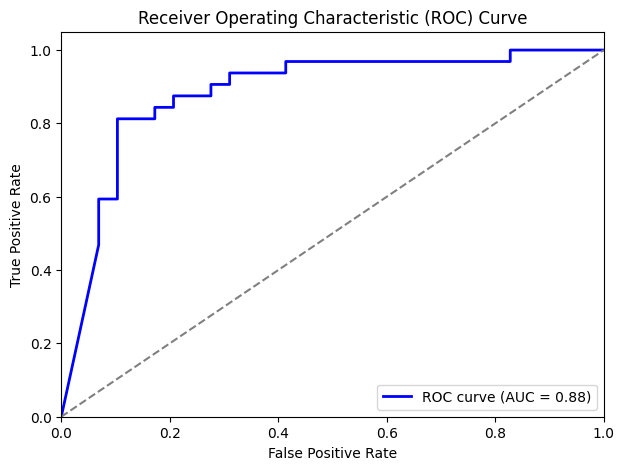

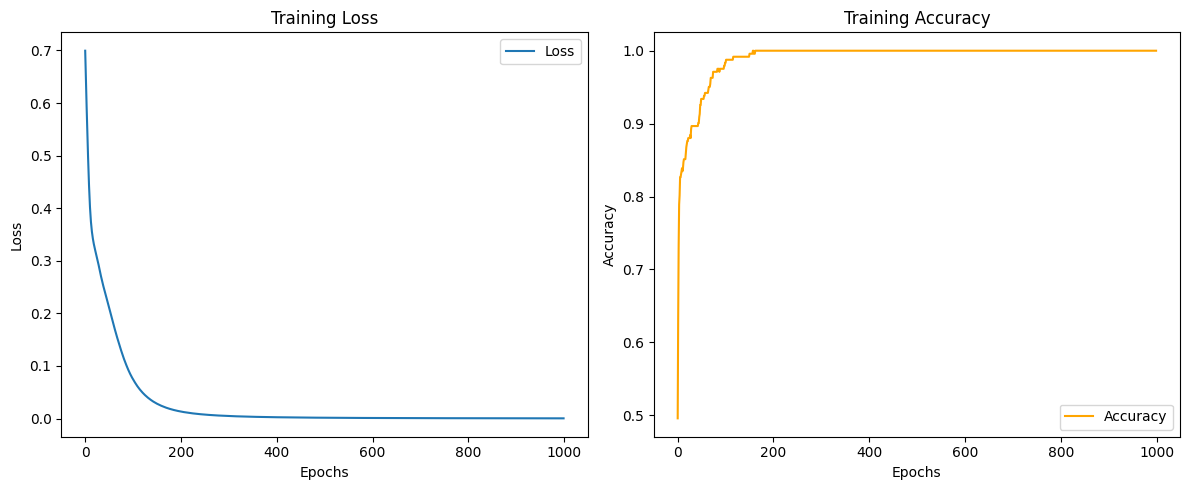

In [115]:
# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(accuracies)), accuracies, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

У межах лабораторної роботи було реалізовано багатошаровий перцептрон (MLP) для розв'язання задачі бінарної класифікації. Основною метою дослідження було вивчити, як саме різні гіперпараметри моделі — зокрема кількість нейронів у прихованому шарі, кількість епох та швидкість навчання — впливають на якість навчання, точність класифікації та загальну поведінку мережі.

Провівши низку експериментів, я з'ясувала, що найкращих результатів можна досягнути за умови правильного балансу між складністю архітектури моделі та обсягом навчання. Зокрема, використання надто простої мережі з одним нейроном у прихованому шарі не дало змоги досягти високої точності — у такому випадку модель не мала достатньої гнучкості для вивчення залежностей у даних. У свою чергу, надто мала кількість епох, наприклад 100, виявилася недостатньою навіть для моделей із прийнятною архітектурою: модель просто не встигала навчитись, що проявлялося у низькій точності, відсутності зменшення функції втрат та нездатності розпізнати один із класів.

Навпаки, при збільшенні кількості епох до 500 і вище точність значно зростала, модель мала достатньо часу для навчання, втрати зменшувались плавно, а якість класифікації обох класів була збалансованою. Помітним було також те, що використання швидкості навчання 0.001 забезпечувало стабільну і передбачувану динаміку збіжності. Водночас підвищення цього параметра до 0.01 прискорювало навчання, але лише за умови, що архітектура мережі залишалась помірною. Якщо ж водночас з великим кроком навчання збільшувалась і кількість нейронів до 45 і більше, то вже спостерігалося перенавчання. У таких випадках модель досягала 100% точності на тренувальних даних, але втрачала здатність узагальнювати, що проявлялось у різкому зростанні функції втрат на тестових даних, незважаючи на формально хорошу тестову точність.

Таким чином, я переконалася, що найкращі результати були досягнуті при помірній архітектурі (близько 3–10 нейронів у прихованому шарі), середній швидкості навчання (0.001 або 0.01) та достатній кількості епох (від 500 до 1000). Саме в таких конфігураціях модель демонструвала найкращу збалансованість між точністю, здатністю до узагальнення та стабільністю навчання. Занадто складні або занадто прості моделі виявилися менш ефективними, і це підтвердило важливість розумного підбору гіперпараметрів під конкретну задачу.

PyTorch <br>

Активаційні функції:<br>
У прихованому шарі використано ReLU (Rectified Linear Unit) — вона забезпечує ефективне навчання, дозволяє уникнути затухання градієнта.<br>
У вихідному шарі — Sigmoid, яка перетворює вихід у діапазон [0,1], що ідеально підходить для задач бінарної класифікації.<br>

Функція втрат:<br>
BCELoss (Binary Cross Entropy Loss) — використовується для оцінки помилки в бінарній класифікації. Вона добре працює з виходом sigmoid.<br>

Архітектура мережі:<br>
Модель складається з:<br>
вхідного шару (кількість нейронів = кількість ознак у датасеті),<br>
одного прихованого шару з N нейронів (змінюється під час експериментів),<br>
вихідного шару з одним нейроном.<br>

Імплементація на PyTorch є кращою завдяки модульності, масштабованості та наявності автоматичного диференціювання. PyTorch дозволяє швидко змінювати архітектуру, візуалізувати процес тренування та легко інтегрувати нові функціональності. У рамках експериментів було виявлено, що зі збільшенням кількості нейронів та кількості епох модель суттєво покращує точність, досягаючи понад 96% точності, що свідчить про її високу ефективність.

NumPy-імплементації<br>
Активаційні функції:<br>
У прихованому шарі використовується ReLU.<br>
У вихідному шарі — Sigmoid, що генерує ймовірність класу.<br>

Функція втрат:<br>
Реалізована вручну через обчислення бінарної кросентропії<br>

Архітектура мережі:<br>
Вхідний шар (2 нейрони)<br>
Прихований шар (4 нейрони, ReLU)<br>
Вихідний шар (1 нейрон, Sigmoid)<br>

Імплементація на NumPy є базовою, придатною для навчання принципам роботи нейронної мережі. Однак вона потребує ручної реалізації всіх етапів: прямого та зворотного поширення, функцій активації та втрат. Тому в реальних задачах перевага однозначно за PyTorch, який забезпечує більшу ефективність, простоту та точність.